In [17]:
import numpy as np 
import pandas as pd 
import os
print(os.getcwd())
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn import metrics
df = pd.read_csv('C:\\Users\\ALVIN\\Downloads\\car data.csv')
df.head()

C:\Users\ALVIN\task 1


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [15]:
df.shape


(301, 9)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [21]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [91]:
print(df.Fuel_Type.value_counts())
print(df.Selling_type.value_counts())
print(df.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Selling_type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [95]:
print(df.columns.tolist())


['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Fuel_Type', 'Selling_type', 'Transmission', 'Owner']


In [99]:
print(df.columns.tolist())
df.columns = df.columns.str.strip()
print(df.dtypes)


['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Fuel_Type', 'Selling_type', 'Transmission', 'Owner']
Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
dtype: object


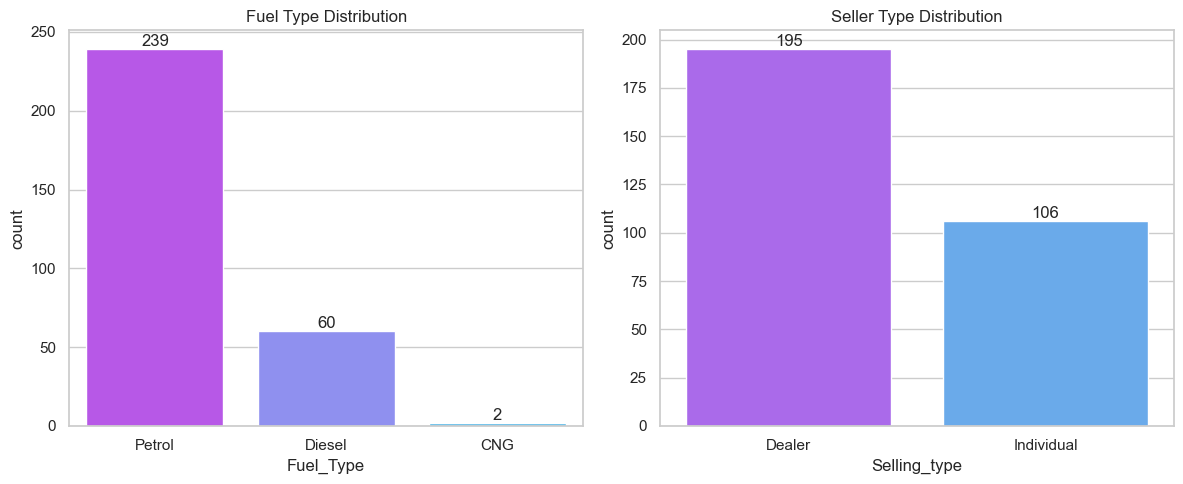

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# First plot for Fuel_Type
ax = sns.countplot(data=df, x='Fuel_Type', hue='Fuel_Type', ax=axes[0], palette='cool_r', legend=False)
ax.set_title('Fuel Type Distribution')
for bars in ax.containers:
    ax.bar_label(bars)

# Second plot for Selling_type
ax = sns.countplot(data=df, x='Selling_type', hue='Selling_type', ax=axes[1], palette='cool_r', legend=False)
ax.set_title('Seller Type Distribution')
for bars in ax.containers:
    ax.bar_label(bars)

plt.tight_layout()
plt.show()


In [111]:
# Replacing values and retaining the old downcasting behavior
df.replace({"Fuel_Type": {"Petrol": 0, "Diesel": 1, "CNG": 2}}, inplace=True)
df = df.infer_objects(copy=False)

df.replace({"Transmission": {"Manual": 0, "Automatic": 1}}, inplace=True)
df = df.infer_objects(copy=False)


In [113]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,Dealer,0,0
1,sx4,2013,4.75,9.54,43000,1,Dealer,0,0
2,ciaz,2017,7.25,9.85,6900,0,Dealer,0,0
3,wagon r,2011,2.85,4.15,5200,0,Dealer,0,0
4,swift,2014,4.60,6.87,42450,1,Dealer,0,0


In [137]:
X=df.drop(["Car_Name","Selling_Price"],axis=1)
Y=df["Selling_Price"]
print(X)
print(Y)

     Year  Present_Price  Driven_kms  Fuel_Type Selling_type  Transmission  \
0    2014           5.59       27000          0       Dealer             0   
1    2013           9.54       43000          1       Dealer             0   
2    2017           9.85        6900          0       Dealer             0   
3    2011           4.15        5200          0       Dealer             0   
4    2014           6.87       42450          1       Dealer             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1       Dealer             0   
297  2015           5.90       60000          0       Dealer             0   
298  2009          11.00       87934          0       Dealer             0   
299  2017          12.50        9000          1       Dealer             0   
300  2016           5.90        5464          0       Dealer             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [147]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,random_state=2)

In [161]:
Linear_Reg_Model = LinearRegression()


In [159]:
LinearRegression()

LinearRegression()

In [173]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
label_encoder = LabelEncoder()

# Apply label encoding on the categorical columns
df['Selling_type'] = label_encoder.fit_transform(df['Selling_type'])
df['Fuel_Type'] = label_encoder.fit_transform(df['Fuel_Type'])


In [167]:
print(df.columns.tolist())


['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Fuel_Type', 'Selling_type', 'Transmission', 'Owner']


In [195]:
print(X_train.columns.tolist())


['Car_Name', 'Year', 'Present_Price', 'Driven_kms', 'Fuel_Type', 'Selling_type', 'Transmission', 'Owner']


In [199]:
X_encoded = encoder.fit_transform(X_train[['Car_Name']])  # Replace 'Model_Name' with the correct column name
